## 부스팅boosting
<img src='../img/boosting.png' width='75%'><br>
* 배깅처럼 무작위로 표본을 추출해서 분석하는 것보다 
* 약간의 가능성이 높은 규칙들을 결합시켜 
* 보다 정확한 예측모델을 만들어 내는 것을 의미
     + 즉, 약한 모델 여러개를 결합시켜 강한 모델을 만들어 냄
* 배깅은 여러 분류기를 병렬적으로 연결해서 각 분류기로 부터 얻어진 결과를 한번에 모두 고려
     + => 각 분류기가 학습시 상호 영향을 주지 않음
* 부스팅은 순차적으로 연결해서 전 단계 분류기의 결과가 다음 단계 분류기의 학습과 결과에 영향을 미침
* 부스팅 기법 종류
    + AdaBoost      : 가중치 기반 부스팅 기법
    + Gradientboost : 잔여오차 기반 부스팅 기법
    + XGBoost       : GB 개량 부스팅 기법 (추천!)
    + LightGBM      : XGB 개량 부스팅 기법 (추천!)

In [1]:
#pip install xgboost==1.7.2 lightgbm

In [2]:
from load_ds_module import *

### 테스트용 데이터 생성 및 분할

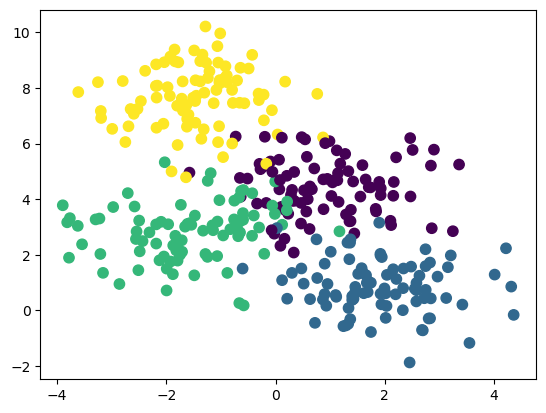

In [3]:
X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, train_size=0.75,
                       stratify=y, random_state=2309271445)

### AdaBoosting 분석

In [5]:
# learning_rate : 학습률
# 가중치 부여 알고리즘
# SAMME.R : soft votting 방식의 가중치 부여 (확률)
# SAMME   : hard votting 방식의 가중치 부여 (값)
adclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
              n_estimators=100, learning_rate=0.5, algorithm='SAMME',
              random_state=2309271445)
adclf.fit(X_train, y_train)
adclf.score(X_train, y_train)

1.0

In [6]:
pred = adclf.predict(X_test)
accuracy_score(y_test, pred)

0.9204545454545454

<Axes: >

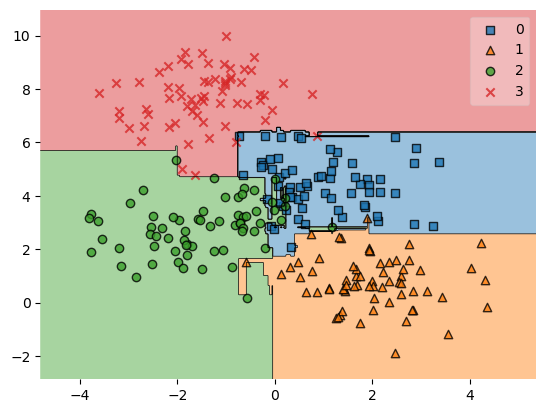

In [7]:
plot_decision_regions(X_train, y_train, adclf)

### GradientBoosting 분석 실행

In [8]:
gdclf = GradientBoostingClassifier(max_depth=4, n_estimators=100, random_state=2309271455)
gdclf.fit(X_train, y_train)
gdclf.score(X_train, y_train)

1.0

In [9]:
pred = gdclf.predict(X_test)
accuracy_score(y_test, pred)

0.8863636363636364

<Axes: >

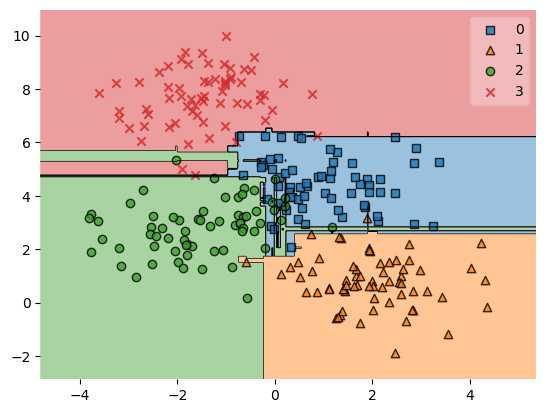

In [10]:
plot_decision_regions(X_train, y_train, gdclf)

## XGBoosting 분석 실행
* 캐글 데이터분석 경진대회 우승자들이 자주 사용했던 분석 기법
* GBM 분석기법 대비 속도와 성능을 향상시킴
* XGBoost 핵심 라이브러리는 C/C++로 작성됨
     + 따라서, sklearn에서 연동하려면 래퍼클래스wrapper class를 사용해야 함
* xgboost.readthedocs.io
* 설치하기 (2023.09.27 기준 v2.0.0)
     + pip3 install xgboost

In [11]:
import xgboost
xgboost.__version__

'1.7.2'

In [12]:
# objective : 분류 목적 지정
# binary:logistic : 이항분류
# multi:softmax : 다항분류
xgbclf = XGBClassifier(n_estimators=50, max_depth=4,
                      learning_rate=0.25, objective='multi:softmax',
                      random_state=2309271505)
xgbclf.fit(X_train, y_train)
xgbclf.score(X_train, y_train)

1.0

In [13]:
pred = xgbclf.predict(X_test)
accuracy_score(y_test, pred)

0.9090909090909091

<Axes: >

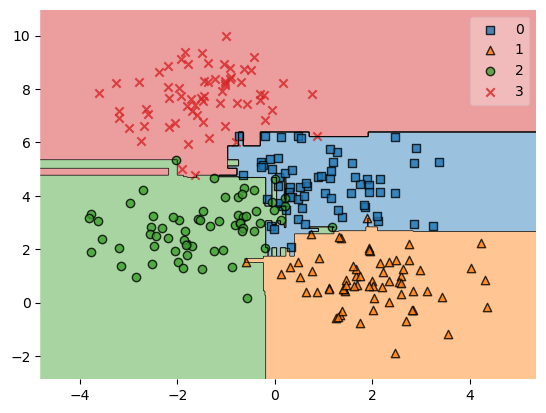

In [14]:
plot_decision_regions(X_train, y_train, xgbclf)

## LightGBoosting 분석 실행
* 부스팅 계열 분석 알고리즘에서 가장 각광을 받고 있음
* XGB는 다른 알고리즘보다 성능이 좋지만 느리고 메모리를 많이 사용한다는 단점 존재
* 그에 비해 LGB는 속도도 빠르고 메모리도 적게 먹음
     + 즉, XGB의 장점은 수용하고 단점은 보완한 알고리즘임
* lightgbm.readthedocs.io
* 설치하기 (2023.09.27 기준 v4.1.0)
     + pip install lightgbm

In [15]:
import lightgbm
lightgbm.__version__

'4.1.0'

In [18]:
lgbclf = LGBMClassifier(n_estimators=50, objective='multiclass',
                       learning_rate=0.5, max_depth=4, random_state=2309271515)
lgbclf.fit(X_train, y_train)
lgbclf.score(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 2
[LightGBM] [Info] Start training from score -1.378690
[LightGBM] [Info] Start training from score -1.378690
[LightGBM] [Info] Start training from score -1.393957
[LightGBM] [Info] Start training from score -1.393957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

1.0

In [21]:
pred = lgbclf.predict(X_test)
accuracy_score(y_test, pred)

0.9090909090909091

<Axes: >

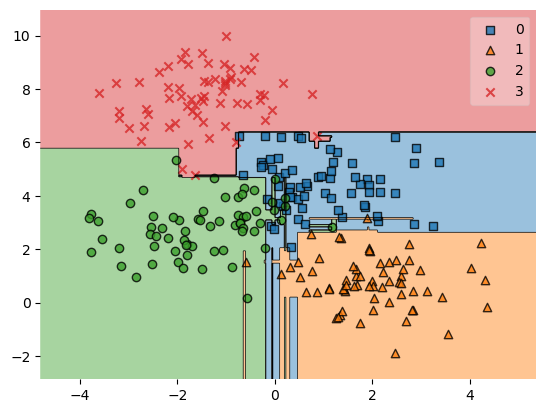

In [22]:
plot_decision_regions(X_train, y_train, lgbclf)

### CatBoost 분석